In [88]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:\\University Documents\\Assignments\\6th Semester\\Artificial Intelligence\\Datasets\\penguins.csv')
df = df.drop(['species', 'island'], axis=1)
df = df.dropna()
filt = df['sex'] == '.'
df.drop(index=df.index[filt], axis=0, inplace=True)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [89]:
y = df['sex'].values
x = df.iloc[:, :df.shape[1]-1]

In [90]:
from sklearn.model_selection import train_test_split as t_split
x_train, x_test, y_train, y_test = t_split(x, y, test_size=0.3)

In [91]:
from collections import Counter
counter = Counter(y_train)
counter

# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# y_train = encoder.fit_transform(y_train)
# y_train

Counter({'MALE': 120, 'FEMALE': 113})

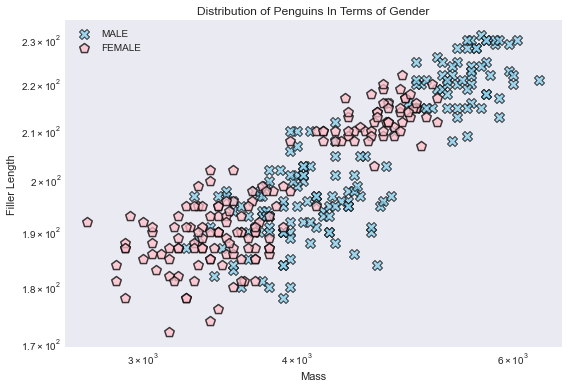

In [114]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

filt = df['sex'] == 'MALE'
mass_male = df.loc[filt, df.columns[-2]].values
fil_length_male = df.loc[filt, df.columns[-3]].values

mass_female = df.loc[~filt, df.columns[-2]]
fil_length_female = df.loc[~filt, df.columns[-3]].values

plt.scatter(mass_male, fil_length_male, label='MALE', s=100, color='skyblue',
            marker='X', edgecolor='black', linewidth=1, alpha=0.75)
plt.scatter(mass_female, fil_length_female,
            label='FEMALE', s=100, color='pink', marker='p', edgecolor='black', linewidth=1.5, alpha=0.75)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Mass')
plt.ylabel('Filler Length')
plt.title('Distribution of Penguins In Terms of Gender')
plt.legend()
plt.tight_layout()
plt.show()